## Lets train the text classifier
this notebook is almost identical to 03_TrainClassifierModel with minor changes

In [3]:
import numpy as np
import pandas as pd
from fastai.text.all import *
import torch

In [4]:
# Read the classifier data
fastai_text_multilabel_classifier_data = torch.load(r"..\multilabel_classifier_data.pkl")

In [5]:
# Set the batch size to 16 
fastai_text_multilabel_classifier_data.bs = 16

In [6]:
fastai_text_multilabel_classifier_data.show_batch(max_n=3)

,text,None
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,xxbos xxmaj silver xxmaj becomes a xxmaj victim xxmaj of xxmaj the xxmaj global xxmaj sell xxmaj off \r\r\n\r\r\n xxmaj the time to buy is when there is blood in the streets … … \r\r\n\r\r\n https : / / t.co / xxunk \r\r\n\r\r\n▁ # gold \r\r\n▁ # silver \r\r\n▁ # mining \r\r\n▁ # xxmaj trade \r\r\n▁ # investments \r\r\n▁ # speculator \r\r\n▁ # xxmaj markets \r\r\n▁ # xxmaj powell \r\r\n▁ # profits \r\r\n▁ # money \r\r\n▁ # xxmaj oil \r\r\n▁ # xxmaj trump \r\r\n▁ # coronavirus \r\r\n▁ # stocks \r\r\n▁ # xxmaj china \r\r\n▁ # xxmaj italy,Negative
2,xxbos xxup do nt xxup let xxup your xxup business xxup be a xxup target xxup if xxup you xxup have xxup to xxup close xxup temporarily xxup due xxup to # covid_19 ( coronavirus ) \r\r\n\r\r\n xxunk xxup xxunk xxup in xxup protecting xxup vacant xxup properties & & xxup construction xxup sites \r\r\n\r\r\n xxup we xxup are xxup offering xxup special xxup discounted xxup prices xxup for xxup all xxup businesses xxup effected xxup at xxup this xxup very xxup tough xxup time . https : / / t.co / xxunk,Positive


In [7]:
fastai_text_multilabel_classifier_data.multi_categorize.vocab

['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive']

In [8]:
# Premare the model
learner = text_classifier_learner(fastai_text_multilabel_classifier_data, AWD_LSTM, drop_mult=1.0)

### We will load the updated encoder that we got after training the language model

In [9]:
# Load the encoders
learner.load_encoder(r"E:\Work\Data_Science\Projects\Text_Classification_FastAI_V2\model\enc")

SuggestedLRs(valley=0.005248074419796467)

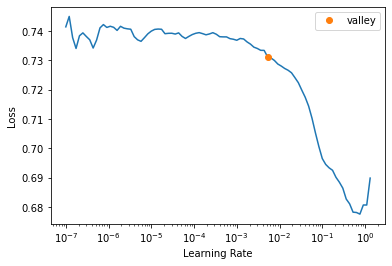

In [10]:
# Finding the best learning rate
learner.lr_find()

In [11]:
# Train only the last few layers for 5 epochs
learner.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.476717,0.450991,01:46
1,0.472530,0.446116,01:50
2,0.466218,0.439740,01:53
3,0.465979,0.440043,01:52
4,0.466982,0.438577,01:53


SuggestedLRs(valley=0.001737800776027143)

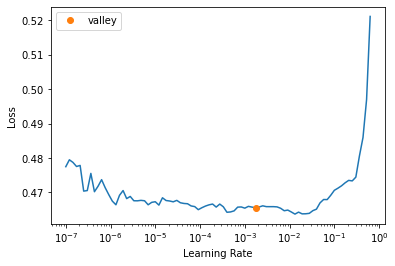

In [12]:
# Unfreeze all weights
learner.unfreeze()
learner.lr_find()

In [13]:
learner.fit_one_cycle(3, slice(1e-10, 1e-1))

epoch,train_loss,valid_loss,time
0,0.482405,0.450612,03:23
1,0.462902,0.455542,03:29
2,0.455111,0.502414,03:32
